**Importation of needed Libraries**

In [33]:
from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

print(__doc__)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')

Automatically created module for IPython interactive environment


**Dataset Importaion and Processing**

The dataset - lfw_people were imported from sklearn.datasets. The label to predict is the identity of the individuals in the image (image recognition).

In [34]:
# Downloading and loading the dataset as numpy arrays
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)


# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


**Splitting data into a training set and a test set with test_size of 20%, and printing the resulting input variables X**

In [35]:
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_test.shape)
print(X_train.shape)

(258, 1850)
(1030, 1850)


**Instantiate Kmeans and setting the parameters**

In [36]:
#Calling needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

t = time()  

km = KMeans(n_clusters=7, max_iter=100)               #number of clusters is set as 7 as the dataset has 7 classes of images. Maximum iteration is set as 100

clusts = km.fit_predict(X_train)

print("done in %0.3fs" % (time() - t))

y_kmeans = km.predict(X_test)

done in 4.149s


**Calculating the accuracy of the K-means model**

In [37]:
from sklearn.metrics import accuracy_score

model_score = accuracy_score(y_kmeans, y_test)

print("K means cluster accuracy = ", model_score)

K means cluster accuracy =  0.17829457364341086


**Quantitative evaluation of the model quality/accuracy on the test set**

Predicting people's names on the test set
done in 0.000s
                   precision    recall  f1-score   support

     Ariel Sharon       0.03      0.09      0.05        11
     Colin Powell       0.22      0.17      0.19        47
  Donald Rumsfeld       0.00      0.00      0.00        22
    George W Bush       0.55      0.24      0.33       119
Gerhard Schroeder       0.08      0.16      0.11        19
      Hugo Chavez       0.04      0.08      0.05        13
       Tony Blair       0.11      0.19      0.14        27

         accuracy                           0.18       258
        macro avg       0.15      0.13      0.12       258
     weighted avg       0.32      0.18      0.21       258



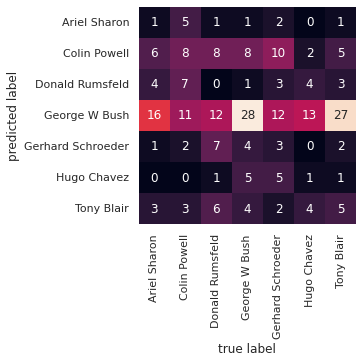

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()  

print("Predicting people's names on the test set")
t0 = time()
y_pred = y_kmeans
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))

#print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))
mat = confusion_matrix(y_kmeans, y_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_names,
            yticklabels=target_names)

plt.xlabel('true label')
plt.ylabel('predicted label');

> **Result: With the number of clusters as 7 and max_iter of 100, K-means clustering produced an accuracy of approximately 18%.**

**Qualitative evaluation of the predictions using matplotlib**

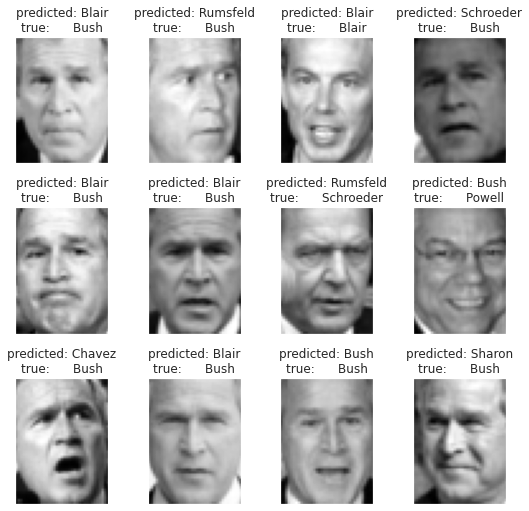

In [39]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# plot the result of the prediction on a portion of the test set
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)


plt.show()

The above plots show how the Learner predicted the images.

**Finding the optimal number of clusters for each dataset (clust)**

Text(0, 0.5, 'WCSS')

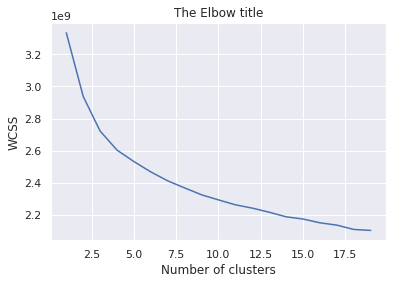

In [40]:
wcss=[]
for i in range(1,20):
    kmeans = KMeans(i)
    kmeans.fit(X)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,20)

plt.plot(number_clusters, wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

**The above graph showed the optimal number of clusters is somewhere around 4. However, utilizing 4 as number of clusters means information would only be produced on the first 4 images. Meaning information on the last 3 people would be lost.**